# Question 1: Extracting Tesla Stock Data Using yfinance

In [3]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data
tesla = yf.Ticker("TSLA")

# Retrieve historical data
tesla_stock_data = tesla.history(period="max")

# Display the first 5 rows
tesla_stock_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2: Extracting Tesla Revenue Data Using Web Scraping

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL containing Tesla revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Headers to mimic a real browser
headers = {"User-Agent": "Mozilla/5.0"}

# Send the request with headers
response = requests.get(url, headers=headers)

# Check if request was successful
if response.status_code != 200:
    print("Failed to retrieve the webpage")
else:
    soup = BeautifulSoup(response.text, "html.parser")

    # Find all tables on the page
    tables = soup.find_all("table")

    # Check if tables were found
    if len(tables) > 1:
        revenue_table = tables[1]  # Identify the correct table

        # Extract data from the table
        tesla_revenue = pd.read_html(str(revenue_table))[0]

        # Rename columns and clean the data
        tesla_revenue.columns = ["Date", "Revenue"]
        tesla_revenue = tesla_revenue[:-1]  # Remove the last unwanted row

        # Display the data
        print(tesla_revenue.head())
    else:
        print("Revenue table not found on the page")

         Date  Revenue
0  2024-12-31  $25,707
1  2024-09-30  $25,182
2  2024-06-30  $25,500
3  2024-03-31  $21,301
4  2023-12-31  $25,167


<ipython-input-7-1ff0b26127f1>:28: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(revenue_table))[0]


# Question 3: Extracting GameStop Stock Data Using yfinance

In [8]:
# Download GameStop stock data
gamestop = yf.Ticker("GME")

# Retrieve historical data
gamestop_stock_data = gamestop.history(period="max")

# Display the first 5 rows
gamestop_stock_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4: Extracting GameStop Revenue Data Using Web Scraping

In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for GameStop revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Headers to mimic a real browser
headers = {"User-Agent": "Mozilla/5.0"}

# Send request
response = requests.get(url, headers=headers)

# Check if request was successful
if response.status_code != 200:
    print("Failed to retrieve the webpage")
else:
    soup = BeautifulSoup(response.text, "html.parser")

    # Find all tables on the page
    tables = soup.find_all("table")

    # Check if tables were found
    if len(tables) > 1:  # Ensure there are enough tables
        revenue_table = tables[1]  # Identify the correct table

        # Extract data
        gamestop_revenue = pd.read_html(str(revenue_table))[0]

        # Rename columns and clean data
        gamestop_revenue.columns = ["Date", "Revenue"]
        gamestop_revenue = gamestop_revenue[:-1]  # Remove last row

        # Display data
        print(gamestop_revenue.head())
    else:
        print("Revenue table not found on the page")

         Date Revenue
0  2024-10-31    $860
1  2024-07-31    $798
2  2024-04-30    $882
3  2024-01-31  $1,794
4  2023-10-31  $1,078


<ipython-input-10-9047bc7557bf>:28: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gamestop_revenue = pd.read_html(str(revenue_table))[0]


# Question 5: Tesla Stock and Revenue Dashboard

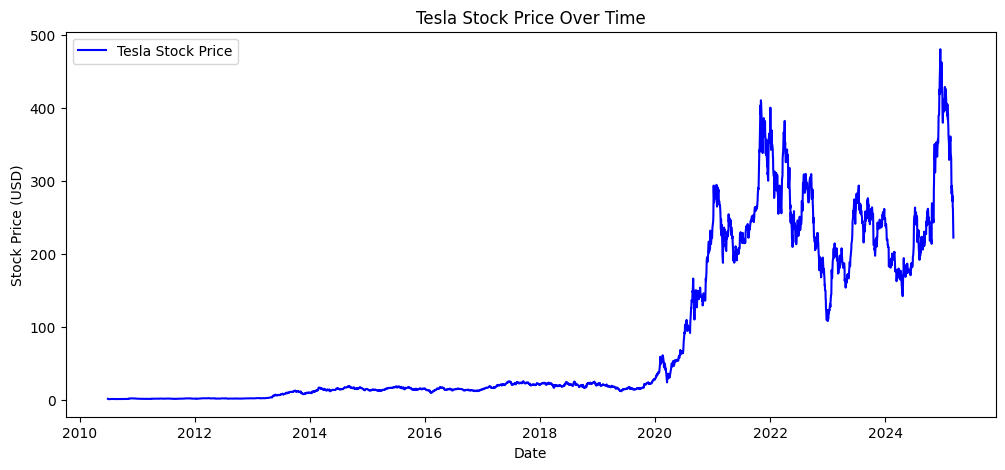

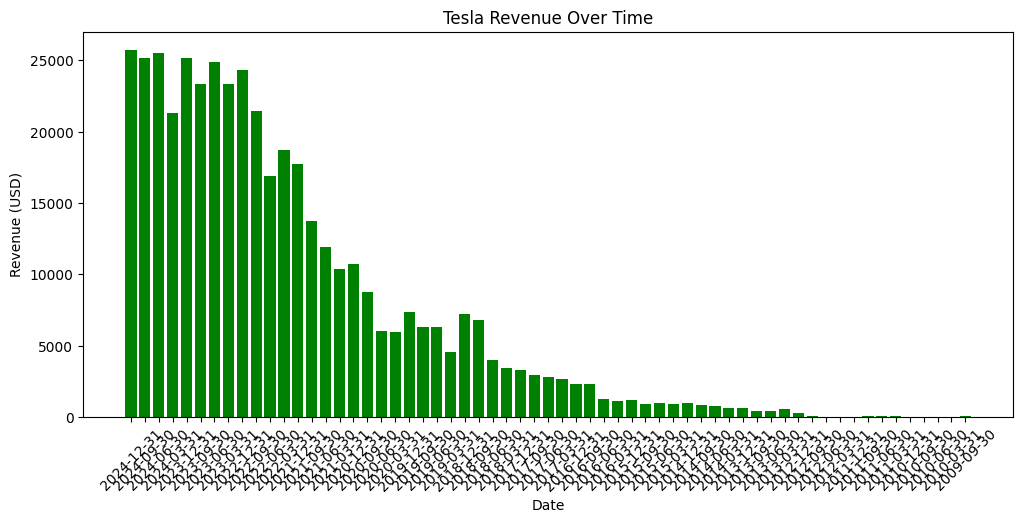

In [12]:
import matplotlib.pyplot as plt

# Clean Tesla revenue column (remove '$' and ',')
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace({'\$': '', ',': ''}, regex=True)

# Convert revenue column to float
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors='coerce')

# Drop NaN values (if any exist after conversion)
tesla_revenue.dropna(inplace=True)

# Plot Tesla stock price
plt.figure(figsize=(12, 5))
plt.plot(tesla_stock_data.index, tesla_stock_data["Close"], label="Tesla Stock Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Tesla Stock Price Over Time")
plt.legend()
plt.show()

# Plot Tesla revenue
plt.figure(figsize=(12, 5))
plt.bar(tesla_revenue["Date"], tesla_revenue["Revenue"], color='green')
plt.xlabel("Date")
plt.ylabel("Revenue (USD)")
plt.title("Tesla Revenue Over Time")
plt.xticks(rotation=45)
plt.show()

# Question 6: GameStop Stock and Revenue Dashboard

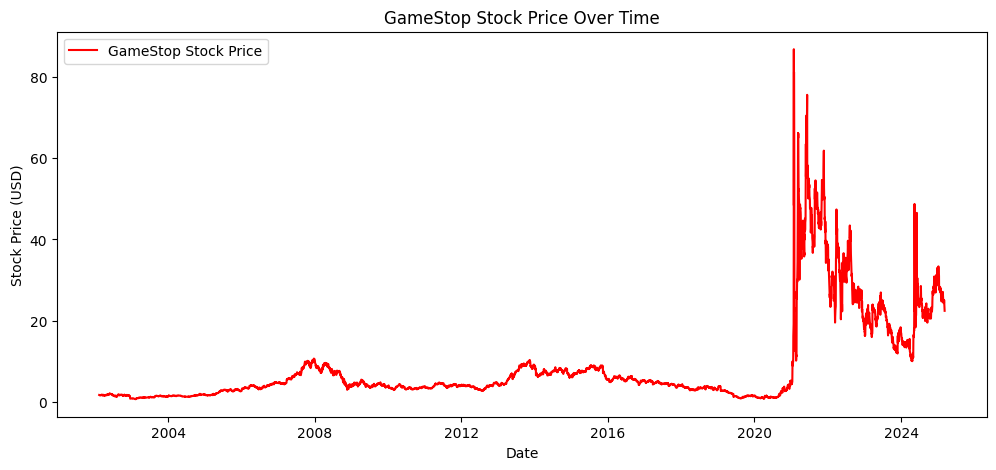

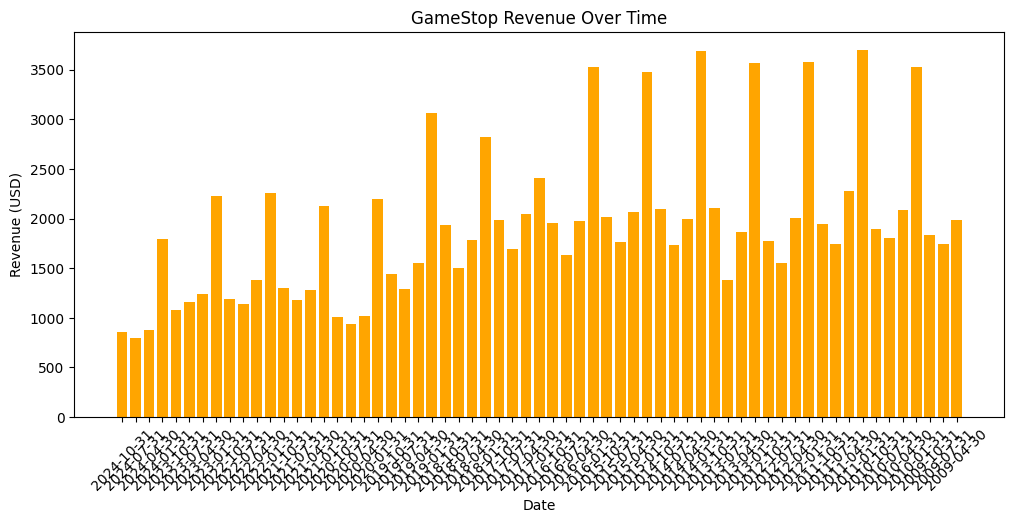

In [14]:
import matplotlib.pyplot as plt

# Clean GameStop revenue column (remove '$' and ',')
gamestop_revenue["Revenue"] = gamestop_revenue["Revenue"].replace({'\$': '', ',': ''}, regex=True)

# Convert revenue column to float
gamestop_revenue["Revenue"] = pd.to_numeric(gamestop_revenue["Revenue"], errors='coerce')

# Drop NaN values (if any exist after conversion)
gamestop_revenue.dropna(inplace=True)

# Plot GameStop stock price
plt.figure(figsize=(12, 5))
plt.plot(gamestop_stock_data.index, gamestop_stock_data["Close"], label="GameStop Stock Price", color='red')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("GameStop Stock Price Over Time")
plt.legend()
plt.show()

# Plot GameStop revenue
plt.figure(figsize=(12, 5))
plt.bar(gamestop_revenue["Date"], gamestop_revenue["Revenue"], color='orange')
plt.xlabel("Date")
plt.ylabel("Revenue (USD)")
plt.title("GameStop Revenue Over Time")
plt.xticks(rotation=45)
plt.show()